# **Applied Statistics Problems Notebook**

This notebook contains my answers to each of the four problems given for the assessment of the Applied Statistics module.

| Problem | Title | What the Task Involves |
| :--  | :---: |  :---:  |
| 1 | Extending the Lady Tasting Tea | Expanding Fisher's Lady Tasting experiment so that there are 12 cups: 8 tea-first and 4 milk-first |
| 2 | Normal Distribution | Generating many samples from a standard normal distribution to compare the behaviour of the sample standard deviation (ddof=1) with the population standard deviation (ddof=0). |
| 3 | t-Tests | |
| 4 | ANOVA | |

The aim of the notebook is to show an understanding of the key principles of statistics and to demonstrate the following abilities, taken from the learning outcomes of the module:

- Describe the stochastic nature of real-world measurements.

- Source documentation to programmatically perform a statistical test.

- Select an appropriate statistical test to investigate a claim.

- Perform a statistical test on a data set.

Within this notebook, `code blocks` are used wherever code is referenced.

***
## Problem 1: Extending the Lady Tasting Tea

The Lady Tasting Tea experiment is a randomised experiment devised by Ronald Fisher (X). In the experiment, 8 randomly ordered cups of tea are prepared: 4 of those cups of tea are prepared with milk followed by tea and 4 get tea first followed by milk. A participant claims they can distinguish the 2 sets of cups of tea from one another without seeing them being prepared.

The null hypothesis of the experiment is that the subject drinking the tea is not able to distinguish whether the cup they are drinking from had the tea or milk poured in it first.

In this first problem I will extend the Lady Tasting Tea experiment so that there are 12 cups: 8 tea-first and 4 milk-first.

I will use `numpy` (X) to randomly shuffle the cups many times and then calculate the probability of the participant correctly identifying all cups by chance.

Let's begin by importing the libraries relevant to this problem:

In [11]:
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Random selections.
# https://docs.python.org/3/library/random.html
import random

Now we will define the cups of tea that will be available in the set, in this version of the experiment there will be 4 with milk first and 8 with tea first.

In [12]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk first.
no_cups_milk_first = 4

# Number of cups of tea with tea first.
no_cups_tea_first = 8

`Math.comb` is a function we can use to find out how many ways to choose k items from n items without repetition and without order (X).

We will use it here to find out how many ways there are to select four cups from 12.

In [13]:
# Number of ways of selecting four cups from 12.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

Evidently there are 495 ways to select four cups from 12.

Now let's work out the probability that the participant in this experiment guesses the four cups correctly.

In [14]:
# Probability that she randomly selects the four correct cups.
p_all_correct = 1 / ways

# Show
p_all_correct

0.00202020202020202

We can now simulate the experiment a number of times (100000 times to give us a more accurate result).

In doing so we will count the number of times the participant correctly identifies all four milk-first cups.

In [15]:
# Number of simulations
n_sims = 100000

# The true cups with milk in first (we label them as cups 0, 1, 2, 3)
true_milk = set(range(no_cups_milk_first))

# Using NumPy to randomly shuffle cups
rng = np.random.default_rng()
hits = 0

for _ in range(n_sims):
    cups = np.arange(no_cups)
    rng.shuffle(cups)
    guess = set(cups[:no_cups_milk_first])  # The participant’s guess
    if guess == true_milk:
        hits += 1

# Estimating the probability
simulated_p = hits / n_sims

print(f"Simulated probability of all correct: {simulated_p:.6f}")
print(f"Exact probability: {p_all_correct:.6f}")

Simulated probability of all correct: 0.002210
Exact probability: 0.002020


In this simulation, I used `Numpy` to randomly shuffle 12 cups (8 tea-first and 4 milk-first) to estimate the probability of a participant correctly identifying all cups by chance.

In this extended 12-cup experiment the probability of correctly identifying all cups by chance is 1 in 495 (p is roughly 0.002) compared to 1 in 70 (p is roughly 0.0143) in the original 8-cup version. This means that perfectly guessing the cups is far less likely in the extended experiment.

This indicates that the extended experiment is more stringent, so we would not need to lower the p-value threshold, and could even relax it slightly since achieving a perfect result is already far less likely by chance.

***
## Problem 2: Normal Distribution

For the second task I will generate 100,000 samples of size 10 from the standard normal distribution. For each sample, I will compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD).

Following this, I will plot histograms of both sets of values on the same axes with transparency and speak about the differences between the two sets.

To begin we will need to import `matplotlib` to help with plotting (X).

We have already imported `numpy` which will also be of use in this task.

In [16]:
# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

Let's begin the task by using `numpy`'s `random` module to generate 100,000 samples of size 10 from the standard normal distribution.

Using 100,000 samples allows us to approximate the sampling distribution of the standard deviation very accurately.

In [17]:
# Drawing 100,000 samples
n_samples = 100000

# Determining the size of each sample
sample_size = 10

# Shape: (100000, 10)
samples = np.random.normal(0, 1, size=(n_samples, sample_size))

# Show
samples

array([[-2.24768692e-01,  8.04049258e-02, -7.09742566e-01, ...,
         2.91081914e-01,  1.11225380e+00,  9.17492703e-01],
       [-1.49575259e+00, -5.35919632e-01, -1.50895269e+00, ...,
        -6.68425197e-01,  4.50445779e-01,  5.03454930e-01],
       [-5.76624248e-01,  5.85916808e-01,  2.20585976e-01, ...,
        -4.64277357e-01, -2.59961955e-01, -7.47388737e-01],
       ...,
       [ 3.14121303e-01, -7.28796542e-01, -1.06986447e+00, ...,
         6.33317150e-01, -2.06235953e-01,  3.07710763e-04],
       [-2.57272606e+00, -2.16752180e-01, -3.62376453e-01, ...,
        -5.28090418e-01, -5.86974538e-01,  4.51784203e-01],
       [ 2.26274584e+00,  1.21253368e+00,  5.57385070e-01, ...,
         1.15156078e-01, -3.24831916e-01,  1.55025152e-01]])

For each sample, I will compute the standard deviation (a measure of how spread out the values in a dataset are from their mean (X)) with ddof=1 (sample standard deviation) and with ddof=0 (population standard deviation).

`ddof` controls what number you divide by when computing variance or standard deviation.

`ddof=1` divides by N-1 while `ddof=0` divides by N.

In [18]:
# Sample SD
sd_ddof1 = samples.std(axis=1, ddof=1)

# Population SD
sd_ddof0 = samples.std(axis=1, ddof=0)

Now that we have the standard deviation of each sample I will plot histograms of both sets of values on the same axes with transparency (`alpha`).

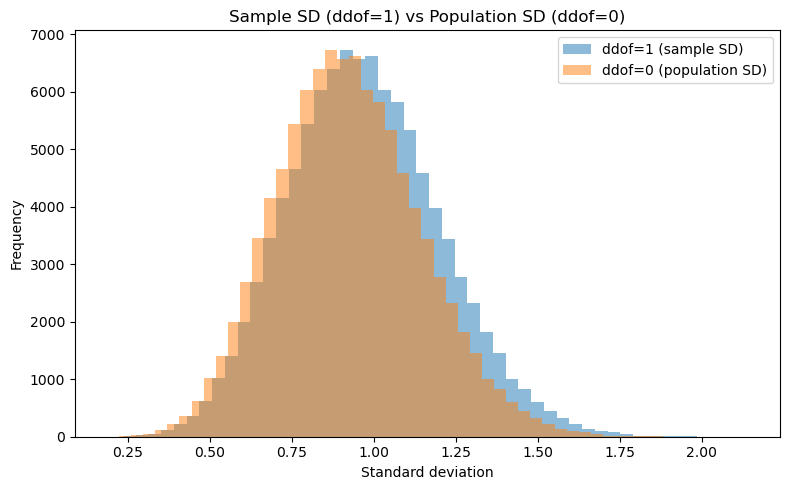

In [19]:
# Plotting the histograms
plt.figure(figsize=(8, 5))
plt.hist(sd_ddof1, bins=50, alpha=0.5, label="ddof=1 (sample SD)")
plt.hist(sd_ddof0, bins=50, alpha=0.5, label="ddof=0 (population SD)")
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.title("Sample SD (ddof=1) vs Population SD (ddof=0)")
plt.legend()
plt.tight_layout()
plt.show()

In the above plot we can see the population SD in orange and sample SD in blue. The ddof=1 distribution is centred slightly to the right of the ddof=0 distribution, reflecting its unbiased nature.

Using `ddof=1` (sample SD) divides by N-1 and gives a better estimate when using a sample, while `ddof=0` (population SD) divides by N and is slightly biased low. This experiment shows that ddof=1 is preferred when estimating the true population variability from a finite sample.

***
## Problem 3: t-Tests

A t-test is a statistical test used to determine whether the means of two groups are significantly different from each other (X). It compares the difference between group means relative to the variation within the groups. By calculating a t value and its corresponding p value, the test helps assess whether an observed difference is likely due to chance or reflects a real effect.

A type II error occurs when a test fails to reject the null hypothesis even though it is false.

In this task I will repeat the following simulation 1,000 times for each mean difference d = 0 , 0.1 , 0.2, … , 1.0:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean 
d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

First I will define each of the mean differences between 0 and 1.0:

In [20]:
# arange pulls evenly spaced values within a given interval
ds = np.arange(0, 1.01, 0.1)

***
## Problem 4: ANOVA

In this final task

***


## References

| Author                                 | Title                                                                                                         | Blurb                           |
| :---                                   |    :----:                                                                                                     |          :---:                  |
| Wikimedia Commons | [ Chardin, 'A Lady Taking Tea' ](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Chardin_-_A_Lady_Taking_Tea%2C_1735.jpg/960px-Chardin_-_A_Lady_Taking_Tea%2C_1735.jpg) | Cover image used in this repositories README, Jean-Baptiste-Siméon Chardin: A Lady Taking Tea (1735). |
| Ronald Fisher | The Design of Experiments (1935) | Ronald Fishers book on experimental design which contains the Lady Tasting Tea experiment. |
| Python Documentation | [Python math.comb documentation](https://docs.python.org/3/library/math.html#math.comb) | Pythons math.comb documentation. |
| Python Documentation | [Python's math module documentation](https://docs.python.org/3/library/math.html) | Information on python's math module. |
| NumPy API Reference | [NumPy Reference Manual](https://numpy.org/doc/stable/reference/index.html#reference) | This reference manual details functions, modules, and objects included in NumPy, describing what they are and what they do. |
| Matplotlib | [Matplotlib Guide](https://matplotlib.org/stable/contents.html) | Guide to plotting with Matplotlib. |
| Laerd Statistics | [Standard Deviation](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) | Laerd Statistics overview of standard deviation. |
| Laerd Statistics | [Independent t-test for two samples](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) | Laerd Statistics guide to t-tests. |
| Wikipedia | [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) | Normal Distribution Wikipedia article. |
| GitHub Docs | [*Basic writing and formatting syntax: Create sophisticated formatting for your prose and code on GitHub with simple syntax*](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) | Guide for the basics of markdown used throughout this notebook; stylising text, making lists, adding images, etc. |
| Solomon, Brad. Real Python | [*Python Plotting with Matplotlib (Guide)*](https://realpython.com/python-matplotlib-guide/) | Lots of useful information on plotting. |

***

## End

***